# Predict result EDA

In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumGothicCoding')

In [65]:
results = pd.read_csv('./sbert_module/data/review_total_predicted.csv')

In [66]:
results.head(1)

,name,review,가성비,귀여운,넓은,단체,만족,모던,분위기,비주얼,아늑,위생,응대,이색음식,이색테마,클래식,혼자
0,카린지린가네스낵바 신촌점,신촌에 새로 문을 연 카린지에서 소스카츠동을 먹었습니다.타래에 적셔있음에도 카츠가 ...,0.00471,0.007695,0.015588,0.032617,0.167872,0.041327,0.014219,0.089195,0.020622,0.077459,0.769467,0.624554,0.015221,0.019678,0.004636


In [67]:
review_train = pd.read_csv('./sbert_module/data/labeled.csv')
label_counts = review_train.iloc[:, 3:].sum()
class_weights = (len(review_train) - label_counts) / label_counts

In [68]:
results.iloc[:, 2:] = results.iloc[:, 2:].applymap(lambda x: 1 if x>0.5 else 0 )
results_mean = results.groupby('name').mean()
results_mean_weighted = results_mean * class_weights
results_mean_weighted_log = results_mean_weighted.applymap(lambda x: np.log(x+1))

In [69]:
def plot_hist(dataframe, title):
    fig, axes = plt.subplots(3, 5, figsize=(18, 8), sharex=True)

    for i, col in enumerate(dataframe.columns):
        axes[i//5, i%5].hist(dataframe[col], bins=50)
        axes[i//5, i%5].set_title(col, fontsize=12)

        score_99 = dataframe[col].quantile(0.8)
        axes[i//5, i%5].axvline(x=score_99, c='k', label='q=0.8')

    # plt.ylim([0, 300])
    plt.suptitle(title, y=0.96, fontsize=22)
    plt.show()

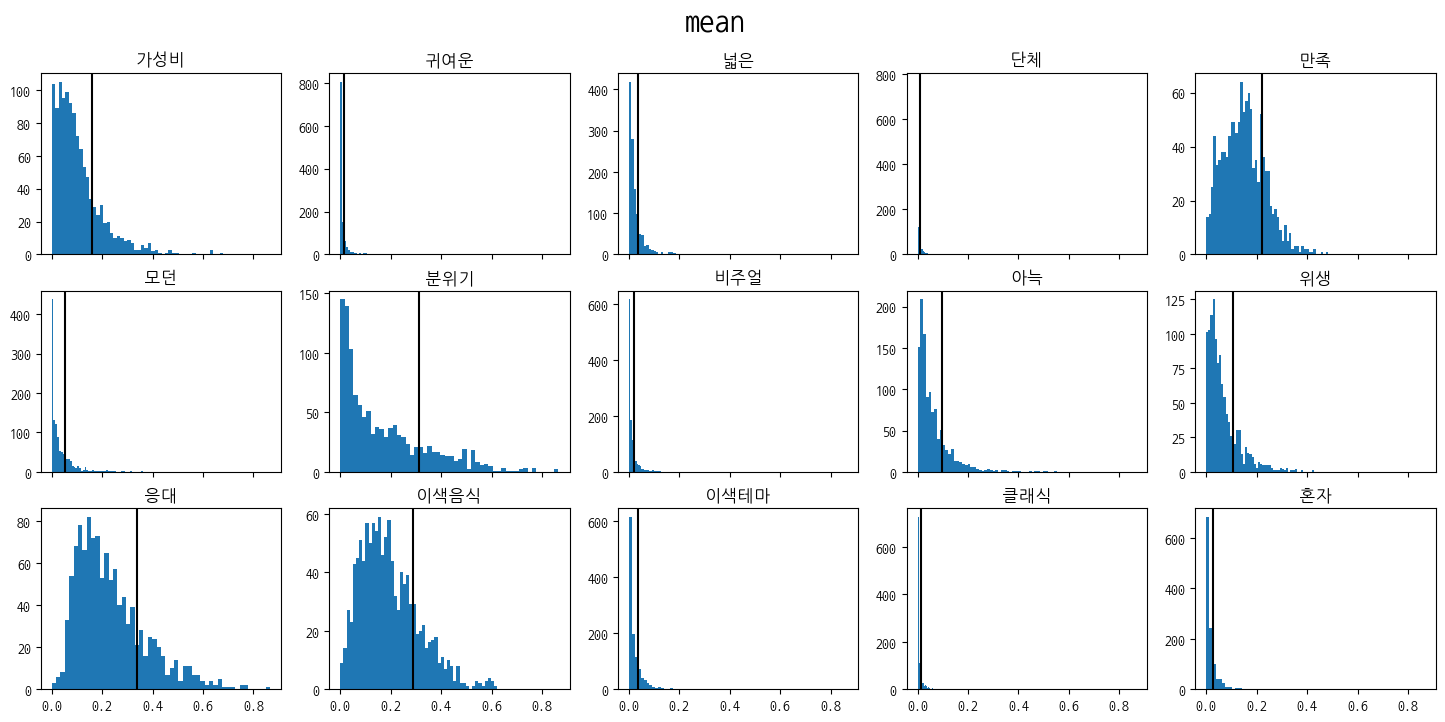

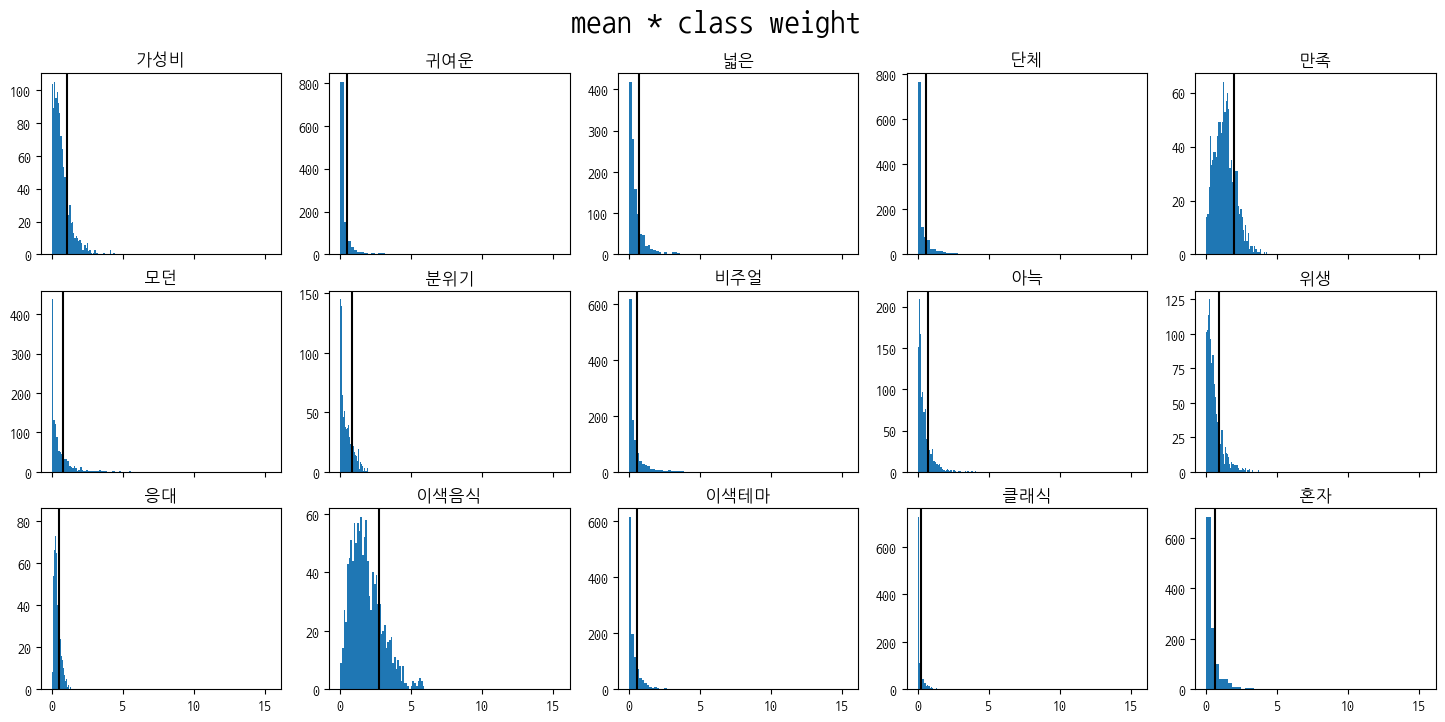

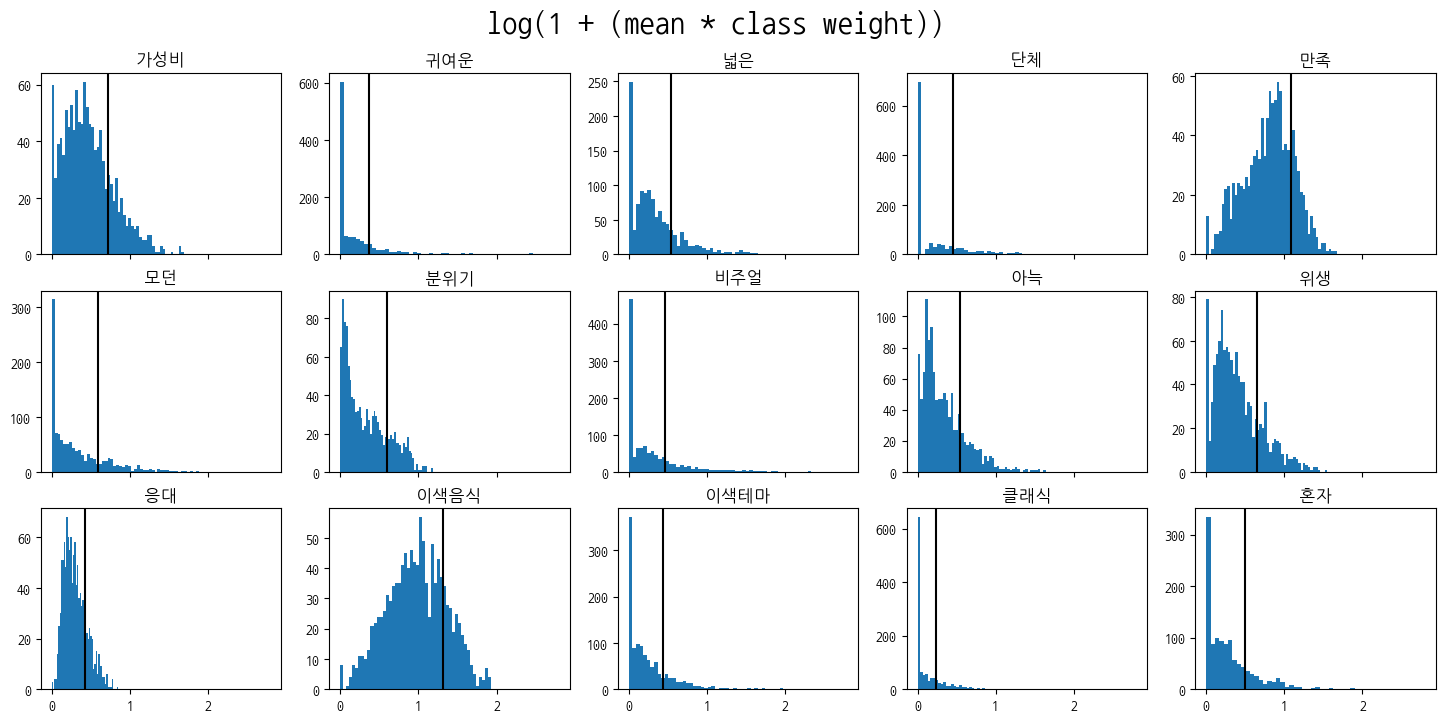

In [70]:
plot_hist(results_mean, 'mean')
plot_hist(results_mean_weighted, 'mean * class weight')
plot_hist(results_mean_weighted_log, 'log(1 + (mean * class weight))')

In [71]:
results_round_mean_weighted_log_to_tag = results_mean_weighted_log.reset_index()

In [72]:
results_round_mean_weighted_log_to_tag.head()

,name,가성비,귀여운,넓은,단체,만족,모던,분위기,비주얼,아늑,위생,응대,이색음식,이색테마,클래식,혼자
0,1984,0.128286,0.373106,0.596931,0.583946,0.337164,0.346795,0.627808,0.784110,0.723011,0.230820,0.143554,0.997447,0.942345,0.177313,0.502160
1,21세기우리바다수산,0.671705,0.000000,0.376369,0.574798,0.836835,0.165888,0.015297,0.164986,0.124526,1.058389,0.325592,0.577842,0.000000,0.000000,0.354807
2,23플래터,0.952988,0.374986,0.257260,0.000000,0.498000,0.702806,0.617899,0.244028,0.830325,0.189761,0.414074,0.605490,0.088628,0.122322,0.136128
3,260도씨 베이커리,0.412577,0.464092,0.000000,0.000000,0.873933,0.000000,0.050106,0.000000,0.000000,0.411165,0.377173,1.628686,0.262930,0.000000,0.000000
4,38도씨식당,0.329800,0.140279,0.328179,0.285275,0.768810,0.652455,0.802734,0.376661,0.291295,0.121940,0.277128,0.905104,0.207065,0.279915,0.113929


In [ ]:
from sklearn.preprocessing import 

In [73]:
results_round_mean_weighted_log_to_tag

,name,가성비,귀여운,넓은,단체,만족,모던,분위기,비주얼,아늑,위생,응대,이색음식,이색테마,클래식,혼자
0,1984,0.128286,0.373106,0.596931,0.583946,0.337164,0.346795,0.627808,0.784110,0.723011,0.230820,0.143554,0.997447,0.942345,0.177313,0.502160
1,21세기우리바다수산,0.671705,0.000000,0.376369,0.574798,0.836835,0.165888,0.015297,0.164986,0.124526,1.058389,0.325592,0.577842,0.000000,0.000000,0.354807
2,23플래터,0.952988,0.374986,0.257260,0.000000,0.498000,0.702806,0.617899,0.244028,0.830325,0.189761,0.414074,0.605490,0.088628,0.122322,0.136128
3,260도씨 베이커리,0.412577,0.464092,0.000000,0.000000,0.873933,0.000000,0.050106,0.000000,0.000000,0.411165,0.377173,1.628686,0.262930,0.000000,0.000000
4,38도씨식당,0.329800,0.140279,0.328179,0.285275,0.768810,0.652455,0.802734,0.376661,0.291295,0.121940,0.277128,0.905104,0.207065,0.279915,0.113929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,히츠지야 연남점,0.658660,0.121079,0.153578,0.447452,1.147179,0.063486,0.297999,0.000000,0.148911,0.498703,0.450547,0.462822,0.651089,0.000000,0.098160
1166,히트커피로스터스 서교,0.168411,0.132259,0.167517,0.270012,0.755352,0.307511,0.296006,0.251792,0.401404,0.217964,0.368878,1.360579,0.359102,0.096310,0.204259
1167,히포 카페테리아,0.055077,0.232622,0.924248,0.453707,0.481954,1.466546,0.791955,0.425483,0.232206,0.470906,0.291652,0.602080,0.788606,0.559059,0.190510
1168,힉스,0.391222,0.000000,0.251238,0.000000,0.503513,0.372324,0.991627,0.000000,1.018181,0.000000,0.523090,0.130744,0.000000,0.667855,0.883637


# Merge

In [10]:
stores_final = pd.read_csv('./sbert_module/data/stores_final.csv')

col_convert = dict(zip(results.columns[-15:], stores_final.columns[-16:-1]))

results_round_mean_weighted_log_to_tag = results_round_mean_weighted_log_to_tag.rename(columns=col_convert)

stores_final_notag = stores_final.iloc[:, :-16]
stores_final_tag = stores_final_notag.merge(results_round_mean_weighted_log_to_tag, how='left', on='name')

stores_final_tag.head(5)

,name,category,address,star,comment,naver_services,station,out,meter,lines,...,modern,ambience,visual,cozy,clean,service,exoticfood,exotictheme,classic,alone
0,뉴욕아파트먼트,양식,서울 마포구 월드컵로3길 14 마포한강2차푸르지오상가 217호,NaN,홍대 수제버거 짱맛있는곳,"네이버예약,네이버톡톡",합정역,9번,279.0,"2호선,6호선",...,0.590779,0.461418,0.298700,0.128617,0.374319,0.266858,1.219454,0.510021,0.219800,0.000000
1,감성타코 합정점,"멕시코,남미음식",서울 마포구 월드컵로3길 14 지하1층,4.46,합정 딜라이트스퀘어 분위기 있는 감성맛집,"네이버페이,네이버예약,네이버주문",합정역,9번,140.0,"2호선,6호선",...,0.130902,0.294531,0.088640,0.344395,0.190811,0.286255,0.780993,0.130902,0.283126,0.198910
2,오레노라멘 본점,일본식라면,서울 마포구 독막로6길 14,4.54,NaN,NaN,합정역,7번,426.0,"2호선,6호선",...,0.000000,0.018501,0.000000,0.068965,0.454265,0.218497,1.221248,0.136037,0.000000,0.416037
3,아우룸,이탈리아음식,서울 마포구 월드컵로5길 33-26,4.73,NaN,NaN,합정역,9번,294.0,"2호선,6호선",...,0.268722,0.517703,0.929152,0.249369,0.527763,0.235977,1.191183,0.143360,0.239437,0.058872
4,슬로우야드 바베큐,양식,서울 마포구 포은로 7 슬로우야드,NaN,NaN,NaN,합정역,8번,324.0,"2호선,6호선",...,1.060458,0.613358,0.384676,0.109401,0.000000,0.324574,0.136385,0.664669,0.000000,0.000000


# Tags

In [11]:
def find_tags(df):
    final_results = []
    for i, row in df.iterrows():
        final_results.append({i: [k for k, v in row.items() if v]}) 
    return final_results

In [12]:
# Round Mean
final_round_tag_mean08 = results_mean_weighted_log > results_mean_weighted_log.mean()*8/5
final_round_tag_mean08_tag = find_tags(final_round_tag_mean08)

In [13]:
# Round Quantile
final_round_tag_quntile08 = results_mean_weighted_log > results_mean_weighted_log.quantile(0.8)
final_round_tag_quntile08_tag = find_tags(final_round_tag_quntile08)

In [14]:
# Union
final_round_tag_union = final_round_tag_mean08 + final_round_tag_quntile08

final_round_tag_union_tag = find_tags(final_round_tag_union)

In [15]:
final_round_tag_union_tag[:5]

[{'1984': ['귀여운', '넓은', '단체', '분위기', '비주얼', '아늑', '이색테마', '혼자']},
 {'21세기우리바다수산': ['단체', '위생']},
 {'23플래터': ['가성비', '귀여운', '모던', '분위기', '아늑']},
 {'260도씨 베이커리': ['귀여운', '이색음식']},
 {'38도씨식당': ['모던', '분위기', '클래식']}]

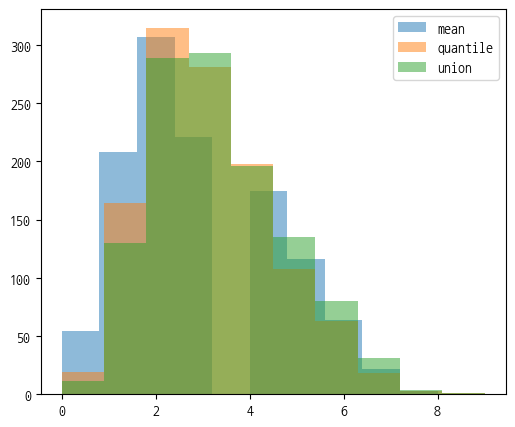

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))

axes.hist([len(list(store.values())[0]) for store in final_round_tag_mean08_tag], bins=10, label='mean', alpha=0.5)
axes.hist([len(list(store.values())[0]) for store in final_round_tag_quntile08_tag], bins=10, label='quantile', alpha=0.5)
axes.hist([len(list(store.values())[0]) for store in final_round_tag_union_tag], bins=10, label='union', alpha=0.5)

plt.legend()
# axes[0].set_title('mean')
# axes[0].set_title('quantile')
# axes[0].set_title('union')

In [17]:
no_tags = np.where(np.array([len(list(store.values())[0]) for store in final_round_tag_union_tag])==0)

In [18]:
for idx in no_tags[0]:
    print(final_round_tag_union_tag[idx])

{'갓잇 연남점': []}
{'대현매운족발 본점': []}
{'아노브 연남': []}
{'연남닭발': []}
{'우와': []}
{'우와 연남점': []}
{'육구덮밥': []}
{'청년닭발1987': []}
{'카쿠시타': []}
{'코노미': []}
{'쿠이신보': []}


In [19]:
final_round_tag_union_tag_dict = {list(store.keys())[0]: ','.join(list(store.values())[0]) for store in final_round_tag_union_tag}

In [20]:
final_tags = pd.Series(final_round_tag_union_tag_dict).reset_index()
final_tags = final_tags.rename(columns={'index': 'name', 0: 'tags'})

In [21]:
store_final_tag = stores_final_tag.merge(final_tags, how='left', on='name')

In [23]:
store_final_tag.to_csv('./sbert_module//data/stores_final_tag.csv', index=False)

In [24]:
store_final_tag.iloc[:, -16:-1].head().style.format('{:.4f}')

,price,cute,wide,corps,satisfaction,modern,ambience,visual,cozy,clean,service,exoticfood,exotictheme,classic,alone
0,0.4851,0.1289,0.3670,0.4719,0.7787,0.5908,0.4614,0.2987,0.1286,0.3743,0.2669,1.2195,0.5100,0.2198,0.0000
1,0.6264,0.3120,1.0812,1.2262,0.9223,0.1309,0.2945,0.0886,0.3444,0.1908,0.2863,0.7810,0.1309,0.2831,0.1989
2,0.4326,0.0000,0.3473,0.0000,1.2330,0.0000,0.0185,0.0000,0.0690,0.4543,0.2185,1.2212,0.1360,0.0000,0.4160
3,0.5796,0.0000,0.3296,0.4039,0.8414,0.2687,0.5177,0.9292,0.2494,0.5278,0.2360,1.1912,0.1434,0.2394,0.0589
4,0.4707,0.3807,1.7545,1.9593,0.4368,1.0605,0.6134,0.3847,0.1094,0.0000,0.3246,0.1364,0.6647,0.0000,0.0000
